In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns

In [3]:
plant_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'], format='%Y-%m-%d %H:%M')
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'], format='%Y-%m-%d %H:%M')


Text(0.5, 1.0, 'AC vs. DC power')

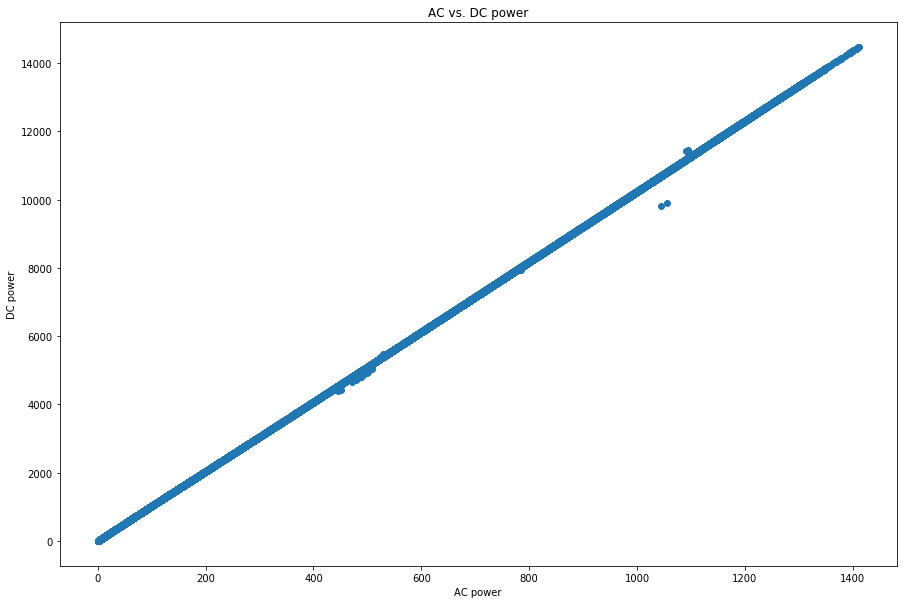

In [4]:
plt.figure(figsize=(15, 10))
plt.scatter(plant_gen['AC_POWER'],plant_gen['DC_POWER'])
plt.xlabel('AC power')
plt.ylabel('DC power')
plt.title('AC vs. DC power')



In [5]:
#function returns the data with the heighest and lowest residuals
def anomaly_calculate(data):
    coeff = np.polyfit(data['AC_POWER'],data['DC_POWER'],1)
    residual = (data['DC_POWER']-coeff[0]*data['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False) # pick whatever number you wish
    mean_res = heighest_residuals['AC/DC_residual'].mean()
    stand_dev = heighest_residuals['AC/DC_residual'].std()
    heighest_residuals = heighest_residuals[(heighest_residuals['AC/DC_residual']>mean_res+3*stand_dev) |
                                     (heighest_residuals['AC/DC_residual']<mean_res-3*stand_dev)]
    return heighest_residuals

heighest_residuals = anomaly_calculate(plant_gen)

In [6]:
#function returns the data with the heightes 100 residuals 
def anomaly_head(data):
    coeff = np.polyfit(data['AC_POWER'],data['DC_POWER'],1)
    residual = (data['DC_POWER']-coeff[0]*data['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False).head(100) # pick whatever number you wish

    return heighest_residuals
head_residuals = anomaly_head(plant_gen)

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 28128.88487772, 105903.45040747, 183678.01593722, 261452.58146697,
        339227.14699672, 417001.71252647, 494776.27805621, 572550.84358596,
        650325.40911571, 728099.97464546, 805874.54017521]),
 <a list of 10 Patch objects>)

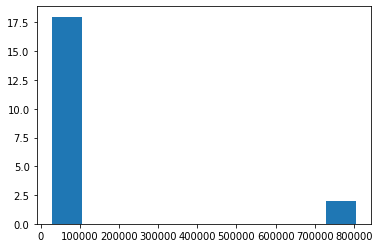

In [7]:
plt.hist(heighest_residuals['AC/DC_residual'])

In [8]:
#anomaly AC residuals during a specific time in a day 
print(heighest_residuals['DATE_TIME'].value_counts())


2020-06-14 08:30:00    16
2020-05-22 13:00:00     4
Name: DATE_TIME, dtype: int64


In [9]:
new_merged_df = pd.merge(heighest_residuals, head_residuals, how='inner', on=['DATE_TIME','SOURCE_KEY'])
new_merged_df


,DATE_TIME,PLANT_ID_x,SOURCE_KEY,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,TOTAL_YIELD_x,AC/DC_residual_x,PLANT_ID_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,TOTAL_YIELD_y,AC/DC_residual_y
0,2020-05-22 13:00:00,4135001,McdE0feGgRqW7Ca,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175,4135001,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175
1,2020-05-22 13:00:00,4135001,sjndEbLyjtCKgGv,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159,4135001,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159
2,2020-05-22 13:00:00,4135001,1IF53ai7Xc0U56Y,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920,4135001,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920
3,2020-05-22 13:00:00,4135001,adLQvlD726eNBSB,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075,4135001,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075
4,2020-06-14 08:30:00,4135001,zVJPv84UY57bAof,4802.875000,487.671429,618.571429,7337578.571,34378.126928,4135001,4802.875000,487.671429,618.571429,7337578.571,34378.126928
5,2020-06-14 08:30:00,4135001,1BY6WEcLGh8j5v7,4431.000000,451.285714,567.142857,6464230.143,34187.849968,4135001,4431.000000,451.285714,567.142857,6464230.143,34187.849968
6,2020-06-14 08:30:00,4135001,rGa61gmuvPhdLxV,4923.000000,499.114286,610.285714,7331280.286,33269.787328,4135001,4923.000000,499.114286,610.285714,7331280.286,33269.787328
7,2020-06-14 08:30:00,4135001,adLQvlD726eNBSB,5025.750000,509.042857,645.142857,6498141.143,32856.576068,4135001,5025.750000,509.042857,645.142857,6498141.143,32856.576068
8,2020-06-14 08:30:00,4135001,ZnxXDlPa8U1GXgE,4791.625000,486.114286,612.714286,6744955.714,32662.193745,4135001,4791.625000,486.114286,612.714286,6744955.714,32662.193745
9,2020-06-14 08:30:00,4135001,VHMLBKoKgIrUVDU,4917.500000,498.242857,627.857143,7430193.857,32034.362036,4135001,4917.500000,498.242857,627.857143,7430193.857,32034.362036


In [10]:
merged_df = pd.merge(heighest_residuals, plant_weat, how='inner', on='DATE_TIME')
merged_df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-22 13:00:00,4135001,McdE0feGgRqW7Ca,9904.571429,1055.750000,4057.000000,7213112.000,805874.540175,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
1,2020-05-22 13:00:00,4135001,sjndEbLyjtCKgGv,9814.285714,1044.900000,4280.000000,7070166.000,769035.638159,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
2,2020-05-22 13:00:00,4135001,1IF53ai7Xc0U56Y,11413.250000,1090.557143,4384.285714,6237631.286,64892.694920,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
3,2020-05-22 13:00:00,4135001,adLQvlD726eNBSB,11439.500000,1093.771429,4435.000000,6326008.000,61550.585075,4135001,HmiyD2TTLFNqkNe,31.318955,54.857410,0.814844
4,2020-06-14 08:30:00,4135001,zVJPv84UY57bAof,4802.875000,487.671429,618.571429,7337578.571,34378.126928,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
5,2020-06-14 08:30:00,4135001,1BY6WEcLGh8j5v7,4431.000000,451.285714,567.142857,6464230.143,34187.849968,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
6,2020-06-14 08:30:00,4135001,rGa61gmuvPhdLxV,4923.000000,499.114286,610.285714,7331280.286,33269.787328,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
7,2020-06-14 08:30:00,4135001,adLQvlD726eNBSB,5025.750000,509.042857,645.142857,6498141.143,32856.576068,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
8,2020-06-14 08:30:00,4135001,ZnxXDlPa8U1GXgE,4791.625000,486.114286,612.714286,6744955.714,32662.193745,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355
9,2020-06-14 08:30:00,4135001,VHMLBKoKgIrUVDU,4917.500000,498.242857,627.857143,7430193.857,32034.362036,4135001,HmiyD2TTLFNqkNe,23.901831,29.702831,0.335355


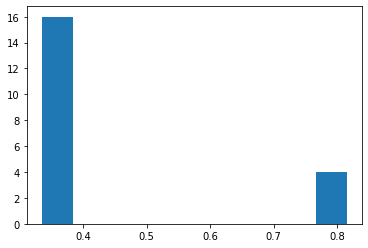

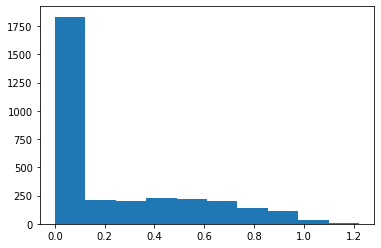

In [11]:
plt.hist(merged_df['IRRADIATION'])
plt.show()
plt.hist(plant_weat['IRRADIATION'])
plt.show()

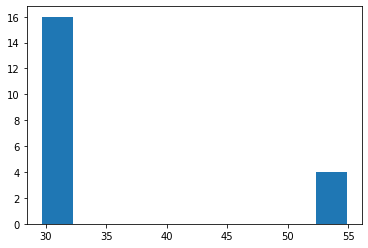

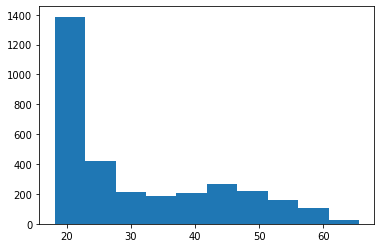

In [12]:
plt.hist(merged_df['MODULE_TEMPERATURE'])
plt.show()
plt.hist(plant_weat['MODULE_TEMPERATURE'])
plt.show()

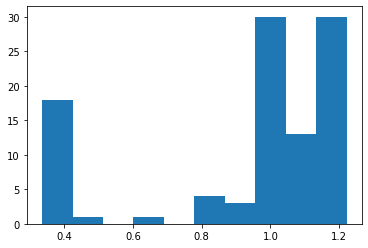

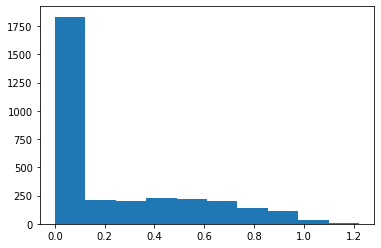

In [13]:
#histograms using head 100 heighest residuals
head_merged = pd.merge(head_residuals, plant_weat, how='inner', on='DATE_TIME')
head_merged
plt.hist(head_merged['IRRADIATION'])
plt.show()
plt.hist(plant_weat['IRRADIATION'])
plt.show()


In [14]:
#function removes the residuals that are higher or lower +- 2std
def remove_outliars(data):
    coeff = np.polyfit(data['AC_POWER'],data['DC_POWER'],1)
    residual = (data['DC_POWER']-coeff[0]*data['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
    residual = pd.DataFrame(residual)
    new_data = data.copy()
    new_data['AC/DC_residual'] = residual
    heighest_residuals = new_data.sort_values('AC/DC_residual', ascending = False) # pick whatever number you wish
    mean_res = heighest_residuals['AC/DC_residual'].mean()
    stand_dev = heighest_residuals['AC/DC_residual'].std()
    print("mean is:",mean_res)
    print("mean+3std:",mean_res+2*stand_dev)
    print("mean+3std:",mean_res-2*stand_dev)
    heighest_residuals = heighest_residuals[(heighest_residuals['AC/DC_residual']<mean_res+2*stand_dev) &
                                     (heighest_residuals['AC/DC_residual']>mean_res-2*stand_dev)]
    return heighest_residuals
residuals_data = remove_outliars(plant_gen)
# residuals_data[residuals_data['AC/DC_residual']<0]

mean is: 122.02161044268749
mean+3std: 8702.621429535939
mean+3std: -8458.578208650564


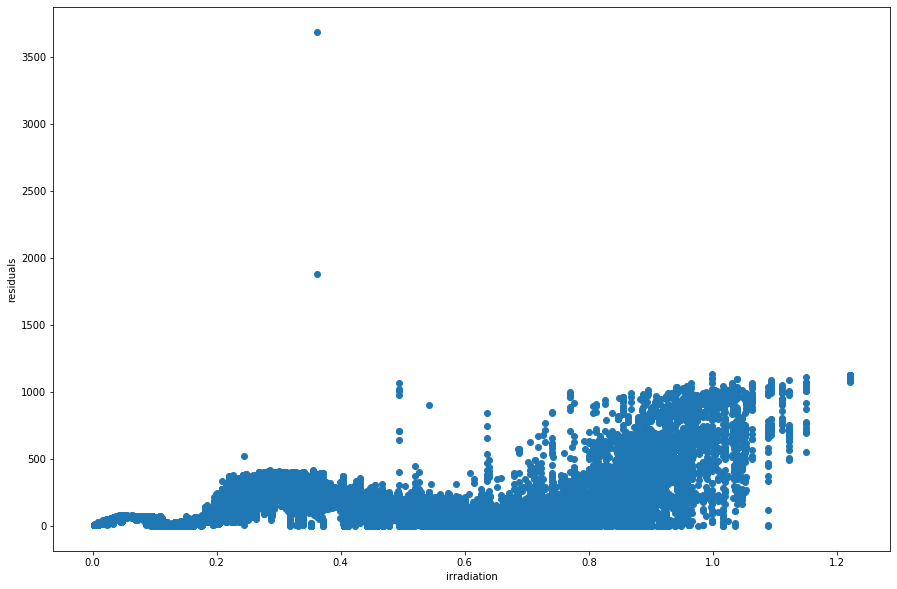

In [15]:
merged_residuals_data = pd.merge(residuals_data, plant_weat, how='inner', on='DATE_TIME')
# clear data from rows where DC is 0
merged_residuals_data = merged_residuals_data[merged_residuals_data['DC_POWER'] != 0] 

plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['IRRADIATION'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('irradiation')
plt.ylabel('residuals')
plt.show()

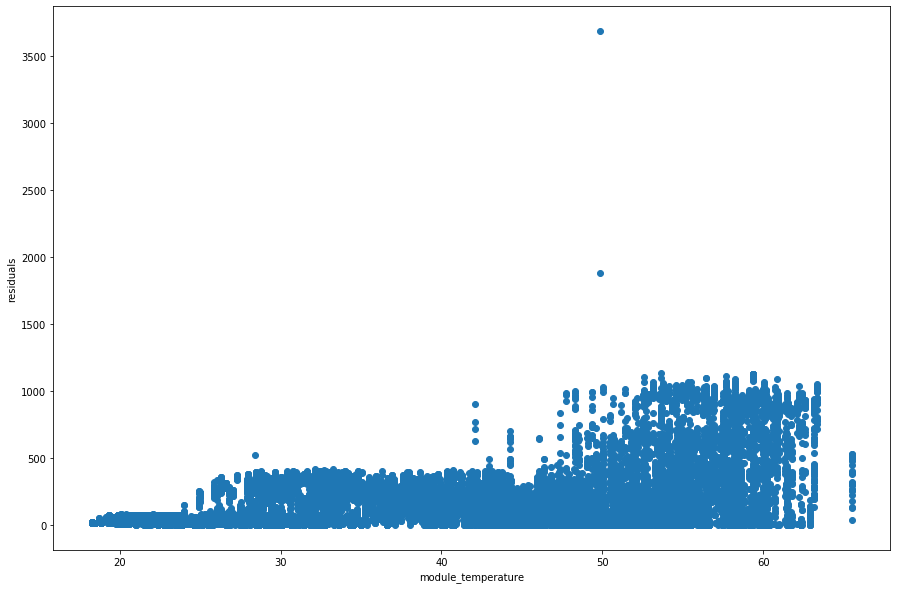

In [16]:
plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['MODULE_TEMPERATURE'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('module_temperature')
plt.ylabel('residuals')
plt.show()

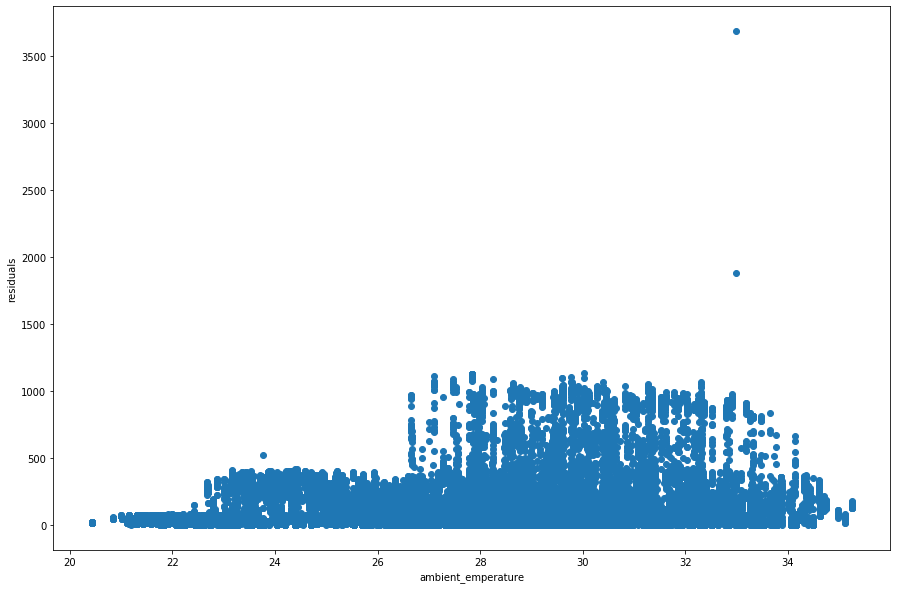

In [17]:
plt.figure(figsize=(15, 10))
plt.scatter(merged_residuals_data['AMBIENT_TEMPERATURE'],merged_residuals_data['AC/DC_residual'])
plt.xlabel('ambient_emperature')
plt.ylabel('residuals')
plt.show()

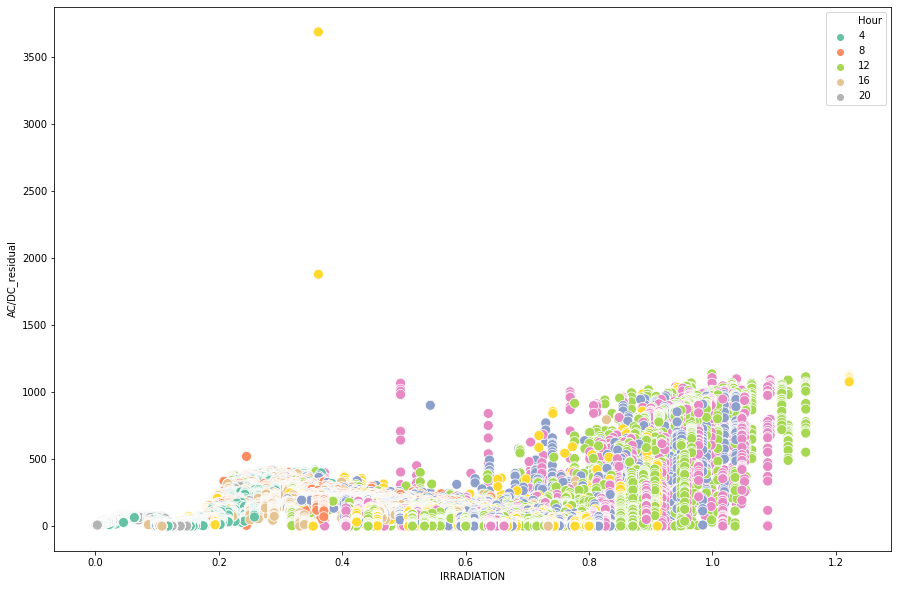

In [18]:
# sns.scatterplot(merged_residuals_data['IRRADIATION'],merged_residuals_data['AC/DC_residual'])
merged_residuals_data['Hour'] = merged_residuals_data.DATE_TIME.dt.hour

plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'IRRADIATION', y = 'AC/DC_residual', data = merged_residuals_data,
               hue = 'Hour', s = 100, palette='Set2')

In [19]:
merged_residuals_data['AC/DC_residual'].std()

193.01591247868583